# Implementación de mi primer Red Neuronal Artificial ANN
 - Creación de un clasificador de imágenes mediante la API secuencial
 - Uso de Keras para cargar el conjunto de datos **FASHION MNIST**
 - Comencemos cargando el conjunto de datos de moda MNIST. Keras tiene varias funciones para cargar conjuntos de datos populares en tf.keras.datasets.
 - El conjunto de datos ya está dividido entre un conjunto de entrenamiento (60 000 imágenes) y un conjunto de prueba (10 000 imágenes).

<div style="text-align: center;">
  <img src="https://image.itmedia.co.jp/ait/articles/2005/28/cover_news016.png" alt="Descripción de la Imagen" style="width: 40%; height: auto;">

# 1. Librerias utilizadas.

In [1]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2. Preprocesamiento.
 - Vamos a realizar la carga del datset de imágenes desde el repositorio de keras.
 - En este caso vamos a dividir el datset en 3 partes:
    - 1 Entrenamiento.
    - 2 Pruebas.
    - 3 Validación.
 - Usaremos 55 000 imágenes para el entrenamiento y 5000 para la validación.
 - Vamos a guardar las ultimas 5000 imágenes del conjunto de entrenamiento para validación.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

 - El conjunto de entrenamiento contiene 60.000 imágenes en escala de grises, cada una de 28 x 28 píxeles:

In [3]:
X_train.shape

(55000, 28, 28)

 - Se realiza proceso de normalización, reducir el tamaño de los píxeles al rango 0-1 dividiéndolas por 255:

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# 3. Mostrar imágenes.
 - Procedemos a mosytrar una imagen utilizando la función imshow() de Matplotlib.

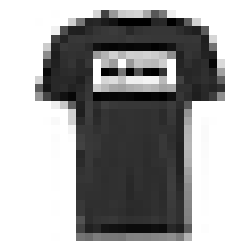

In [17]:
plt.figure(figsize=(6,3))
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

 - Las etiquetas son los identificadores para la clasificación de imágenes del 0 al 9:

In [7]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

 - Definimos la lista de clases para asignar los nombres de las categorías:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

 - La segunda imagen del conjunto de entrenamiento es una camiseta:

In [18]:
class_names[y_train[2]]

'T-shirt/top'

 - Precedemos a mostrar algunas imagenes del conjunto de datos Fashion MNIST.
 - Definimos la función save_fig() que se utiliza para guardar las imágenes en alta resolución generadas en el modelo.

In [47]:
IMAGES_PATH = Path() / "images" / "pru"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

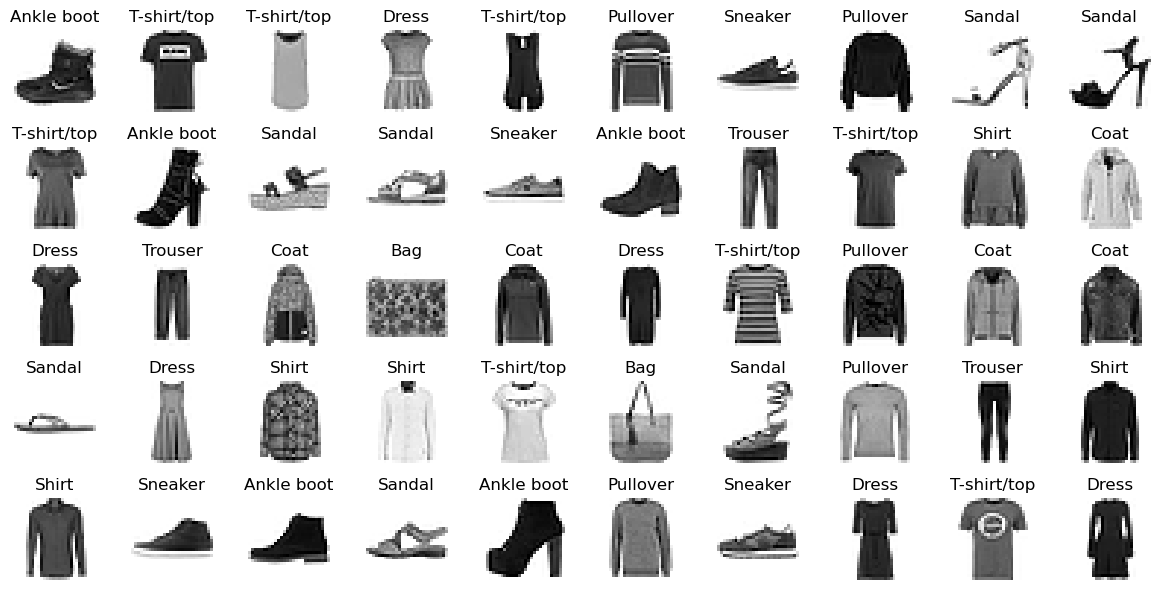

In [48]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

#Guarda la imagen generada en la carpeta definida en la funcion, sólo cambiar el nombre para guardar otro archivo
save_fig("Imagen1_fmn") 
plt.show()

# 4. Configurando la red neuronal.

In [23]:
# 1. Configura la semilla aleatoria para que los pesos de las capas ocultas y de salidas sean los mismos cada vez que se ejecute
tf.random.set_seed(42) 
modelo = tf.keras.Sequential() #2. Crea un modelo secuencial es el tipo mas simple de modelo keras para CNA
modelo.add(tf.keras.layers.InputLayer(shape=[28, 28])) #Primera Capa de entrada especificamos el tamaño de las imágenes
modelo.add(tf.keras.layers.Flatten()) #Función de aplanado, convertir cada imagen de entrada en una matriz 1D 
modelo.add(tf.keras.layers.Dense(300, activation="relu")) #Agregamos una capa oculta densa con 300 neuronas,funcion de activación relu
modelo.add(tf.keras.layers.Dense(100, activation="relu")) #Agregamos una segunda capa densa con 100 neuronas
# Finalmente la capa de salida con 10 neuronas una por clase definida, y la funcion softmax porque son exclusivas
modelo.add(tf.keras.layers.Dense(10, activation="softmax")) 

- Procemos a mostrar un resumen del modelo incluido el nombre de cada capa que se genera.

In [24]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Compilando el modelo.
- Se realiza la compilación del modelo, utilizando el optimizador SGD

In [29]:
modelo.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 6. Entrenando el modelo.
- Procedemos a entrenar el modelo con el dataset de entrenamiento, configurando 30 iteraciones.

In [30]:
history = modelo.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6784 - loss: 0.9928 - val_accuracy: 0.8332 - val_loss: 0.5018
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8283 - loss: 0.5045 - val_accuracy: 0.8398 - val_loss: 0.4537
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8458 - loss: 0.4500 - val_accuracy: 0.8482 - val_loss: 0.4310
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8548 - loss: 0.4185 - val_accuracy: 0.8502 - val_loss: 0.4162
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8609 - loss: 0.3961 - val_accuracy: 0.8544 - val_loss: 0.4051
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8672 - loss: 0.3785 - val_accuracy: 0.8590 - val_loss: 0.3950
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8708 - loss: 0.3641 - val_accuracy: 0.8610 - val_loss: 0.3868
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8751 - loss: 0.3518 - 

# 7. Evaluando el modelo.
- Procedemos a verificar la efectividad de aprendizaje del modelo, con datos de entrenamiento en relación con los datos de validación.

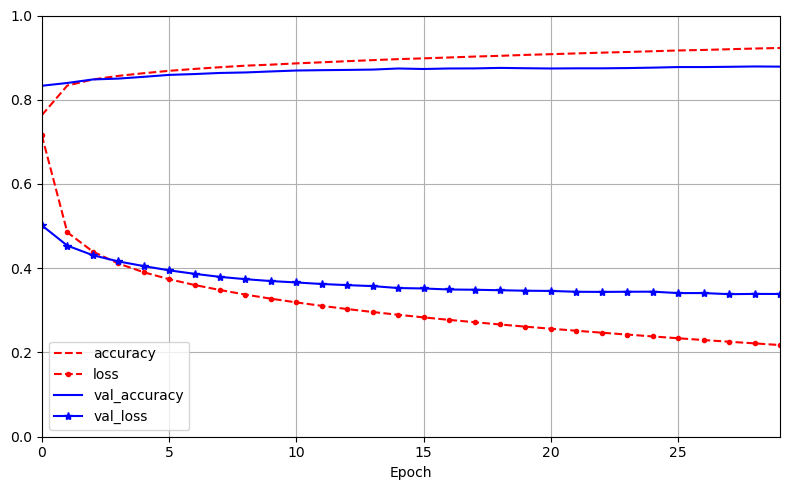

In [31]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot_2")  # extra code
plt.show()

- Se oberva que la curva de aprendizaje crece en relación con los datos de entrenamiento y de validación, y la pérdida tiene a la baja, lo que es una buena señal.

In [33]:

modelo.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8779 - loss: 0.3566


[0.35660189390182495, 0.8777999877929688]

- Observamos una precisión de un 88% y unas pérdida de 358%.

# 8. Testeando el modelo.
- Procedemos a mostrar imagenes del dataset de pruebas con su respectiva clasificación

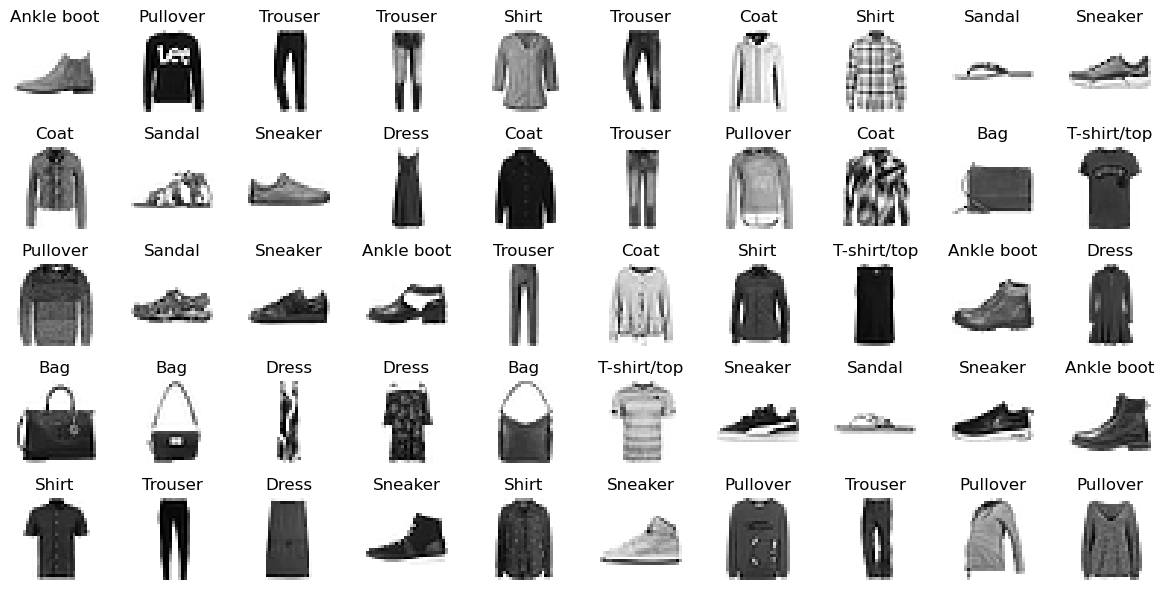

In [34]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("Imagen1_fashinmnist_pru") 
plt.show()

# 8. Probando el modelo para predecir.
- Vamos a usar el modelo para hacer unas predicciones, para el efecto procedemos a mostrar una imagen sin etiquetar.
- Procedemos a tomar unos datos del dataset de pruebas para predecir a que clase pertenece cada imagen
- Generamos un nuevo datset con 5 imagenes del datset de prueba.

In [43]:
X_new_pru = X_test[5:10]

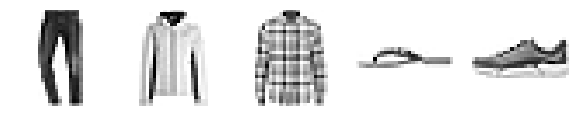

In [44]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new_pru):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_Imagenes_prueba_ANTES', tight_layout=False)
plt.show()

- Mostramos las 5 imagenes del nuevo datset sin etiquetar, es decir sin saber a que categoría pertenecen
- Procedemos a ejecutar el modelo para predecir a que categoría pertenecen las imagenes

In [45]:
y_proba_etiqueta = modelo.predict(X_new_pru) #Hacemos la llamada al modelo para clasificar las nuevas imagenes y lo asiganmos a la etiqueta
y_proba_etiqueta.round(2) # Asignamos el valor de la probabilidad a 2 decimales
y_pred_lab = y_proba_etiqueta.argmax(axis=-1) 
np.array(class_names)[y_pred_lab]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array(['Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

- Podemos observar las clases asignadas correctamente, acertando en cada categoría y que corresponde a cada imagen.

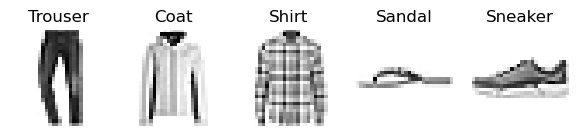

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new_pru):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred_lab[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_Imagenes_prueba_DESPUES', tight_layout=False)
plt.show()